# Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu mushroom.

## 1. Cơ sở lý thuyết
- Mặc dù bộ dữ liệu này ban đầu được đóng góp vào kho lưu trữ Học máy UCI gần 30 năm trước, nhưng việc săn nấm (hay còn gọi là "shrooming") đang ngày càng phổ biến. Hãy tìm hiểu xem đặc điểm nào báo hiệu cái chết chắc chắn và đặc điểm nào dễ chấp nhận nhất trong bộ dữ liệu về đặc điểm nấm này. Và mô hình của bạn có thể chắc chắn đến mức nào?
    

### 1.1 **Nội dung:**
- Bộ dữ liệu này bao gồm các mô tả về các mẫu giả định tương ứng với 23 loài nấm mang thuộc họ Nấm Agaricus và Lepiota, được trích từ Cẩm nang Thực địa về Nấm Bắc Mỹ của Hội Audubon (1981). Mỗi loài được xác định là chắc chắn ăn được, chắc chắn độc, hoặc chưa rõ khả năng ăn được và không được khuyến nghị. Loại sau này được kết hợp với loại độc. Cẩm nang nêu rõ rằng không có quy tắc đơn giản nào để xác định khả năng ăn được của một loại nấm; không có quy tắc nào như "ba lá, để nguyên" đối với Sồi Độc và Thường Xuân Độc.

### 1.2 Mục tiêu bài toán
- Đây là một bài toán Phân loại nhị phân (Binary Classification).
- Mục tiêu là dự đoán xem một cây nấm là Ăn được (Edible) hay Có độc (Poisonous).

## 2. Chuẩn bị dữ liệu

Tải thư viện cần thiết

In [1]:
# Nhóm Thư viện Phân tích Dữ liệu Cốt lõi
import numpy as np        # Dùng cho các phép toán số học
import pandas as pd       # Dùng để xử lý dữ liệu dạng bảng
import matplotlib.pyplot as plt  # Dùng để trực quan hóa dữu liệu
%matplotlib inline

Tải dữ liệu

In [2]:
df = pd.read_csv('../dataset/mushrooms.csv', encoding='latin1')

### 2.1 Đánh giá dữ liệu

- Đặc trưng (Features)

In [3]:
df.head() # Hiển thị 5 dòng đầu tiên của DataFrame

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df[df.duplicated()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


Điểm khác biệt lớn nhất: Không giống bài toán Spam (văn bản tự do), toàn bộ 22 đặc trưng này đều là dữ liệu phân loại (Categorical) dựa trên các đặt tính của các loại nấm,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Từ thông tin được cung cấp từ Kaggle cột class chính là biến mục tiêu mà giá trị các cột còn lại xuất hiện.
> Đặt biệt lệnh info báo cáo rằng không có giá trị Null (NaN).

In [5]:
df['class'].unique() # Hiển thị giá trị biến mục tiêu 


array(['p', 'e'], dtype=object)

- Cột Mục tiêu (Target):
    + Đây là cột $y$ (nhãn) mà chúng ta muốn dự đoán.class (lớp):
        - e = Edible (Ăn được)
        - p = Poisonous (Có độc)

In [6]:
columns_cap = ['cap-shape', 'cap-surface', 'cap-color']
for col in columns_cap:
    print(f"Col : {col}")
    print(df[col].unique())
    print(df[col].value_counts())

Col : cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
Col : cap-surface
['s' 'y' 'f' 'g']
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
Col : cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64


- Nhóm Đặc trưng Mũ Nấm (Cap): là hình dáng, kích thước, màu sắc, bề mặt và cấu trúc dưới mũ (phiến nấm). Hình dáng có thể là hình nón, chuông, ô hoặc phẳng, với kích thước và màu sắc thay đổi theo độ tuổi của nấm. Bề mặt có thể nhẵn hoặc có các vảy, vằn, các sợi tơ, hoặc rãnh nứt. 
    + cap-shape (hình dạng mũ):
        - b = bell (hình chuông)
        - c = conical (hình nón)
        - x = convex (lồi)
        - f = flat (phẳng)
        - k = knobbed (có núm ở giữa)
        - s = sunken (lõm ở giữa)
    + cap-surface (bề mặt mũ):
        - f = fibrous (dạng sợi)
        - g = grooves (có rãnh)
        - y = scaly (có vảy)
        - s = smooth (trơn nhẵn)
    + cap-color (màu sắc mũ):
        - n = brown (nâu)
        - b = buff (vàng da bò)
        - c = cinnamon (màu quế)
        - g = gray (xám)
        - r = green (xanh lá)
        - p = pink (hồng)
        - u = purple (tím)
        - e = red (đỏ)
        - w = white (trắng)
        - y = yellow (vàng)
> Các đặc điểm của mũ nấm là một trong những yếu tố quan trọng để phân biệt nấm ăn được và nấm độc. Không nên dựa vào một đặc điểm duy nhất để xác định, mà cần kết hợp nhiều đặc điểm khác như phiến nấm, cuống nấm và các dấu hiệu khác. 
    

In [7]:
columns_common = ['bruises', 'odor']
for col in columns_common:
    print(f"Col : {col}")
    print(df[col].unique())
    print(df[col].value_counts())

Col : bruises
['t' 'f']
bruises
f    4748
t    3376
Name: count, dtype: int64
Col : odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


- Nhóm Đặc trưng Chung:
    + bruises (vết bầm/dập):
        - t = bruises (có bầm)
        - f = no (không bầm)
    + odor (mùi):
        - a = almond (hạnh nhân)
        - l = anise (mùi hồi)
        - c = creosote (mùi hắc ín)
        - y = fishy (mùi tanh)
        - f = foul (mùi hôi thối)
        - m = musty (mùi mốc)
        - n = none (không mùi)
        - p = pungent (mùi hăng)
        - s = spicy (mùi cay)

In [8]:
columns_gill = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']
for col in columns_gill:
    print(f"Col : {col}")
    print(df[col].unique())
    print(df[col].value_counts())

Col : gill-attachment
['f' 'a']
gill-attachment
f    7914
a     210
Name: count, dtype: int64
Col : gill-spacing
['c' 'w']
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
Col : gill-size
['n' 'b']
gill-size
b    5612
n    2512
Name: count, dtype: int64
Col : gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64


- Nhóm Đặc trưng Mang Nấm (Gills): Mang nấm (gills) là các cấu trúc giống như phiến mỏng nằm dưới mũ nấm, có chức năng sinh sản bằng cách mang bào tử. Chúng có thể có nhiều màu sắc khác nhau như trắng, nâu nhạt, hồng, hoặc thậm chí xanh lục, đen. 
    + gill-attachment (liên kết mang):
        - a = attached (gắn vào thân)
        - d = descending (chạy xuống thân) - Từ Kaggle
        - f = free (tách rời khỏi thân)
        - n = notched (có khía) - Từ Kaggle
    + gill-spacing (khoảng cách mang):
        - c = close (gần nhau) 
        - w = crowded (chen chúc)
        - d = distant (thưa) - Từ Kaggle
    + gill-size (kích thước mang):
        - b = broad (rộng)
        - n = narrow (hẹp)
    + gill-color (màu sắc mang): (Gồm 12 màu, tương tự như cap-color, ví dụ k=black, n=brown...)

In [9]:
columns_stalk = ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']
for col in columns_stalk:
    print(f"Col : {col}")
    print(df[col].unique())
    print(df[col].value_counts())

Col : stalk-shape
['e' 't']
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
Col : stalk-root
['e' 'c' 'b' 'r' '?']
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64
Col : stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64
Col : stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64
Col : stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64
Col : stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64


- Nhóm Đặc trưng Thân/Cuống Nấm (Stalk): Thân/cuống nấm (Stalk) là phần cuống của nấm, có chức năng chính là nâng đỡ mũ nấm và bào tử. Nó thường có hình trụ, dài và cứng. 
    + stalk-shape (hình dạng thân):
        - e = enlarging (phình to ra ở gốc)
        - t = tapering (thon nhỏ lại ở gốc)
    + stalk-root (gốc thân):
        - b = bulbous (phình dạng củ)
        - c = club (dạng dùi cui)
        - u = cup (dạng cốc)
        - e = equal (bằng phẳng)
        - z = rhizomorphs (có rễ giả) - Từ Kaggle
        - r = rooted (có rễ) 
        - ? = missing (THIẾU DỮ LIỆU) 
- $\rightarrow$ Mặc dù lệnh Info báo cáo rằng không có giá trị Null (NaN). NHƯNG (và đây là một cái bẫy phổ biến của bộ dữ liệu này), các giá trị bị thiếu không được ghi là NaN, mà được ghi là một ký tự dấu chấm hỏi '?'.
    + stalk-surface-above-ring (bề mặt thân trên vòng) & stalk-surface-below-ring (bề mặt thân dưới vòng):
        - f = fibrous (dạng sợi)
        - y = scaly (có vảy)
        - k = silky (mượt như lụa)
        - s = smooth (trơn nhẵn)
    + stalk-color-above-ring (màu thân trên vòng) & stalk-color-below-ring (màu thân dưới vòng): 
        - Gồm 9 màu, ví dụ  brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

In [10]:
columns_ring = ['veil-type', 'veil-color', 'ring-number', 'ring-type']
for col in columns_ring:
    print(f"Col : {col}")
    print(df[col].unique())
    print(df[col].value_counts())

Col : veil-type
['p']
veil-type
p    8124
Name: count, dtype: int64
Col : veil-color
['w' 'n' 'o' 'y']
veil-color
w    7924
n      96
o      96
y       8
Name: count, dtype: int64
Col : ring-number
['o' 't' 'n']
ring-number
o    7488
t     600
n      36
Name: count, dtype: int64
Col : ring-type
['p' 'e' 'l' 'f' 'n']
ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64


- Nhóm Đặc trưng Vòng Nấm (Ring):
    + veil-type (loại màng che):
    p = partial (bộ phận)
    u = universal (toàn phần)
    Ghi chú: Gần như 100% dữ liệu là p, nên cột này có thể là "vô dụng", không giúp ích cho mô hình.
    + veil-color (màu màng che):
        - n = brown, o = orange, w = white, y = yellow
    + ring-number (số lượng vòng):
        - n = none (không có)
        - o = one (một vòng)
        - t = two (hai vòng)
    + ring-type (kiểu vòng):
        - c = cobwebby (như mạng nhện)
        - e = evanescent (sớm rụng)
        - f = flaring (loe ra)
        - l = large (rộng)
        - n = none (không có)
        - p = pendant (treo lủng lẳng)
        - sheathing=s & zone=z

In [11]:
columns_environment = ['spore-print-color', 'population', 'habitat']
for col in columns_environment:
    print(f"Col : {col}")
    print(df[col].unique())
    print(df[col].value_counts())

Col : spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64
Col : population
['s' 'n' 'a' 'v' 'y' 'c']
population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64
Col : habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']
habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64


- Nhóm Đặc trưng Môi trường: 
    + spore-print-color (màu bào tử): (Gồm 9 màu, ví dụ black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y)
    + population (quần thể):
        - a = abundant (phong phú)
        - c = clustered (thành cụm)
        - n = numerous (số lượng lớn)
        - s = scattered (phân tán)
        - v = several (vài cây)
        - y = solitary (đơn độc)
    + habitat (môi trường sống):
        - g = grasses (trên cỏ)
        - l = leaves (trên lá)
        - m = meadows (đồng cỏ)
        - p = paths (lối đi)
        - u = urban (đô thị)
        - w = waste (bãi rác)
        - d = woods (trong rừng)

### 2.2 Chọn lọc đặt trưng
Với bộ dữ liệu có số lượng lớn cột như thế. Ta nên tham khảo thêm về cơ sở lý thuyết để thực hiện việc **Feature Selection** (Chọn lọc đặc trưng) từ tập dữ liệu. Việc đưa các cột không liên quan (gọi là "đặc trưng nhiễu" - **noisy features**) vào huấn luyện thường xuyên làm giảm hiệu suất của mô hình.
- Mô hình bị "Quá khớp" (Overfitting) - Đây là hậu quả nghiêm trọng nhất.:
    + Overfitting là gì? Là hiện tượng mô hình "học vẹt" các đặc điểm của dữ liệu huấn luyện (training data), bao gồm cả các "đặc trưng nhiễu" không liên quan.
    + Ví dụ: Giả sử trong 8000 mẫu nấm, tình cờ 70% nấm độc có cap-shape (hình dạng mũ) là 'x' (lồi). Mô hình có thể học một quy tắc sai lầm là: "Nếu mũ lồi $\rightarrow$ Rất có thể là độc".
    + Hậu quả: Khi mô hình gặp dữ liệu mới (test data) mà quy luật "tình cờ" này không còn đúng nữa, nó sẽ dự đoán sai hàng loạt. Nó học quá tốt "nhiễu", thay vì học "tín hiệu" (bản chất) thực sự.
- Giảm độ chính xác (Reduced Accuracy):
    + Hệ quả của Overfitting là độ chính xác trên tập kiểm thử (test set) sẽ bị giảm.
    + Mô hình bị "bối rối" bởi quá nhiều thông tin không liên quan. Tín hiệu từ các cột quan trọng (như odor - mùi) bị "pha loãng" (drown out) bởi nhiễu từ các cột vô dụng (như veil-type).
- Tăng độ phức tạp và Thời gian huấn luyện với dữ liệu lớn. 
- Giảm khả năng diễn giải (Reduced Interpretability): Việc đưa các cột không liên quan sẽ không thể biết được quyết định của nó là dựa trên odor (quan trọng) hay dựa trên cap-shape (ít quan trọng) - vì cả hai đều nằm trong mô hình.

Trong 22 đặc trưng, không phải tất cả đều có giá trị như nhau. Có những đặc trưng gần như "vô dụng", nhưng cũng có những đặc trưng "chỉ cần nhìn là biết độc".
- Trong thực tế, các nhà nấm học (mycologists) thường dựa vào các đặc điểm chính. Và trong bộ dữ liệu cụ thể này, các mô hình học máy cũng phát hiện ra điều tương tự:
    + Nhóm đặt trưng mũ nấm:
        - cap-color (Màu mũ): Nấm độc thường sặc sỡ, nấm ăn màu đơn giản.
        - cap-surface (Bề mặt mũ): Nấm độc có "đốm", "vằn", "nứt".
    + Nhóm Đặc trưng Chung:
        - odor (Mùi): Nấm độc có "nhựa chảy ra" (thường đi kèm mùi hăng/hôi).
    + Nhóm Đặc trưng Mang Nấm (Gills):
        - gill-color (màu sắc mang): Nấm độc lá tia (mang) màu trắng. Nấm ăn màu da/nâu. lưu ý rằng đây không phải là luật tuyệt đối ("một số loại nấm có tia màu trắng nhưng có thể ăn được").
    + Nhóm Đặc trưng Mang Nấm (Gills):
        - gill-color (màu sắc mang): (Gồm 12 màu, tương tự như cap-color, ví dụ k=black, n=brown...)
    + Nhóm Đặc trưng Thân/Cuống Nấm (Stalk):
        - stalk-root (gốc thân)
    + Nhóm Đặc trưng Môi trường:
        - habitat (môi trường sống)


- Các cột nên BỎ (3 cột): Đây là các cột "nhiễu" (noise) hoặc "rác" (garbage). Việc giữ chúng lại sẽ làm mô hình bị nhiễu, chậm hơn và không làm tăng độ chính xác.
    + veil-type (Loại màng che): Đây là một hằng số (Constant). 100% (8124/8124) mẫu nấm trong bộ dữ liệu này đều có giá trị là p (partial). Một cột có tất cả các giá trị giống hệt nhau không cung cấp bất kỳ thông tin gì để giúp mô hình phân biệt độc hay không độc.
    + gill-attachment (Liên kết mang): Đây là cột gần như hằng số (Near-Constant). Hơn 97% (7914/8124) mẫu có giá trị là f (free). Vì có quá ít sự khác biệt, cột này gần như vô dụng và có thể bị loại bỏ.
    + veil-color (Màu màng che): Tương tự như cột trên, đây là cột gần như hằng số. Hơn 97.5% (7924/8124) mẫu có giá trị là w (white). Nó cũng cung cấp rất ít thông tin.


### 2.3 Làm sạch dữ liệu

- Xử lý Dữ liệu Trùng lặp (Handle Duplicates)

In [12]:
df.duplicated().sum() # Kiểm tra số dòng bị trùng lặp trong DataFrame

np.int64(0)

- Xử lý Dữ liệu Thiếu (Handle Missing Values)

In [13]:
df.isnull().sum() # Kiểm tra số giá trị thiếu trong mỗi cột của DataFrame

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- Các giá trị khác đã ổn. Nhưng vẫn còn 1 giá trị bị bỏ qua của stalk-root là ? với giá trị là 2480 dòng. Chiếm 1 số lượng khá lớn ~30% tổng tập dữ liệu. Và Trong thực tế, dữ liệu bị thiếu ('?') ở gốc thân thường không phải là ngẫu nhiên mà có thể do sự cố tình bỏ qua. Nên việc xóa số lượng dữ liệu này là không nên.

In [14]:
data = df

- Mã hóa Nhãn (Target Encoding): Cột class (Độc/Ăn được).

In [15]:
data['class'] = df['class'].map({'e': 0, 'p': 1})

In [16]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 3. Trực quan hóa dữ liệu

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Heatmap

In [18]:
df_encoded = df.copy()

In [ ]:
encoder = LabelEncoder()

In [20]:
# Dùng vòng lặp 'for' để mã hóa TẤT CẢ các cột
for col in df_encoded.columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

In [21]:
# --- Bước 2: Tính toán Ma trận Tương quan ---
# Bây giờ chúng ta có thể chạy hàm .corr()
corr_matrix = df_encoded.corr()

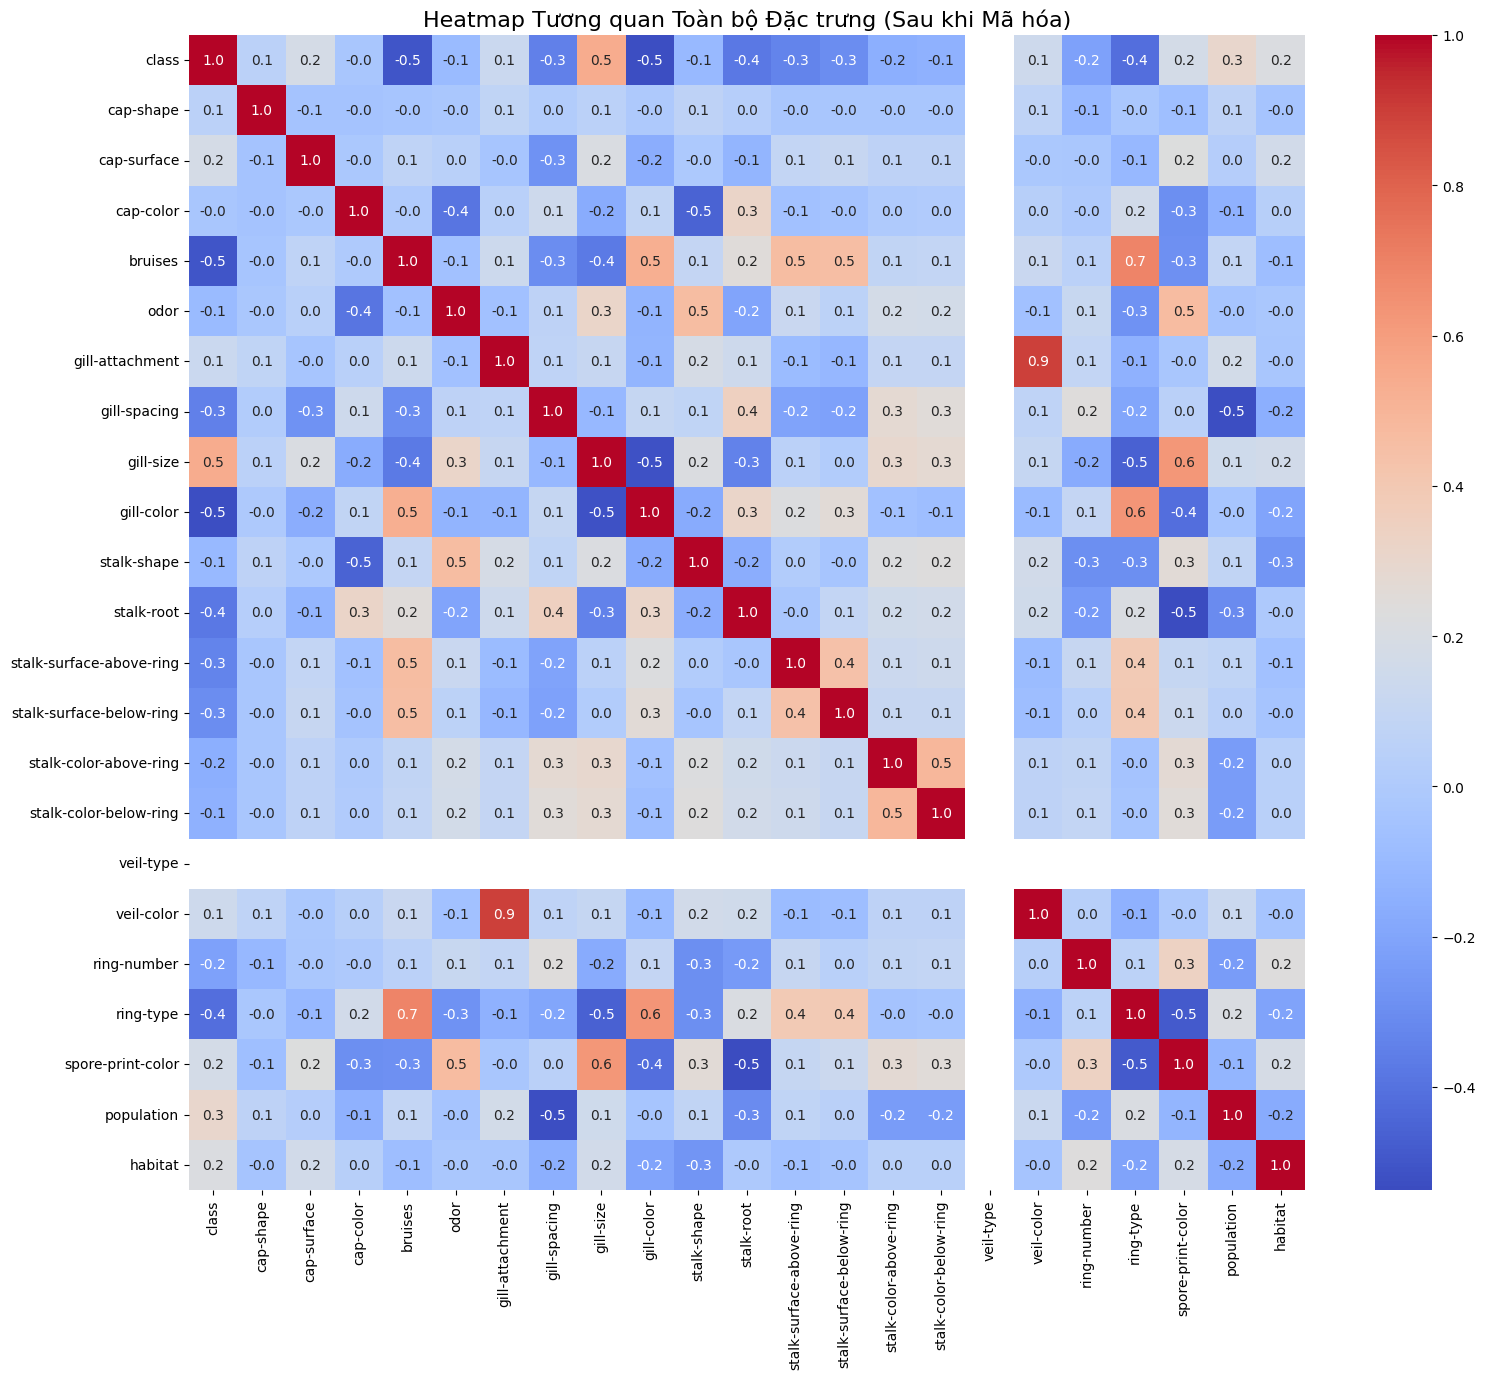

In [22]:
# --- Bước 3: Vẽ Heatmap Toàn bộ (23x23) ---
plt.figure(figsize=(18, 15))
# annot=False: Ẩn các con số (vì quá nhiều, sẽ rối)
# cmap='coolwarm': Dùng thang màu xanh-đỏ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap Tương quan Toàn bộ Đặc trưng (Sau khi Mã hóa)', fontsize=16)
plt.savefig("full_correlation_heatmap.png")
plt.show()

In [23]:
# --- Bước 4: Vẽ Biểu đồ Cột (Cách hữu ích hơn) ---
# Heatmap ở trên quá rối. Ta chỉ cần xem mối tương quan với 'class'
# 1. Lấy cột 'class' từ ma trận
# 2. Bỏ chính nó (drop 'class')
# 3. Sắp xếp (sort_values)
class_corr = corr_matrix['class'].drop('class').sort_values(ascending=False)

C:\Users\kn260\AppData\Local\Temp\ipykernel_22328\2681141687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_corr.values, y=class_corr.index, palette='vlag')


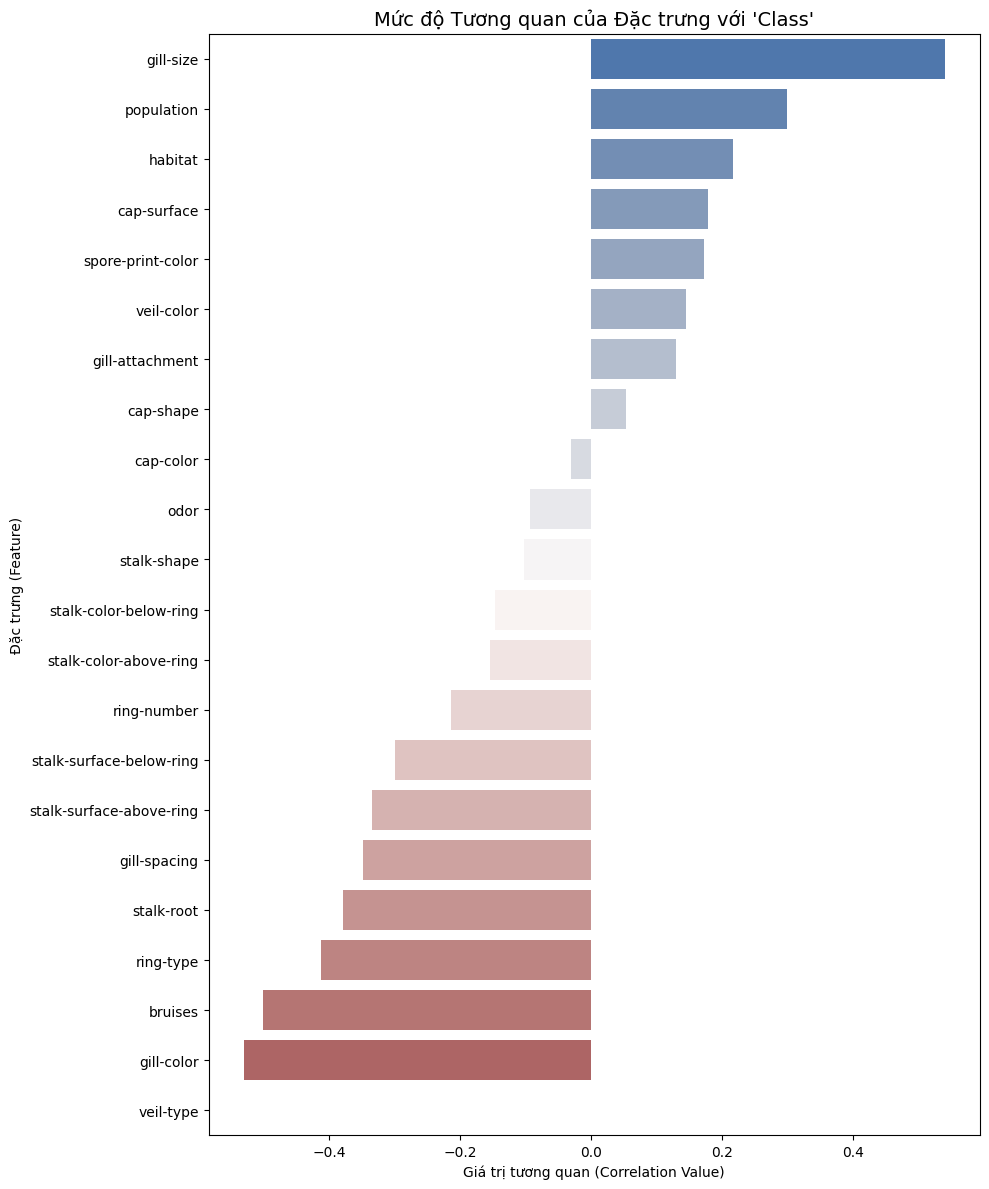

In [24]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 12))
sns.barplot(x=class_corr.values, y=class_corr.index, palette='vlag')
plt.title("Mức độ Tương quan của Đặc trưng với 'Class'", fontsize=14)
plt.xlabel('Giá trị tương quan (Correlation Value)')
plt.ylabel('Đặc trưng (Feature)')
plt.tight_layout()
plt.savefig("class_correlation_barchart.png")
plt.show()

- Trực quan hóa "Tổ hợp" (Feature Interaction)

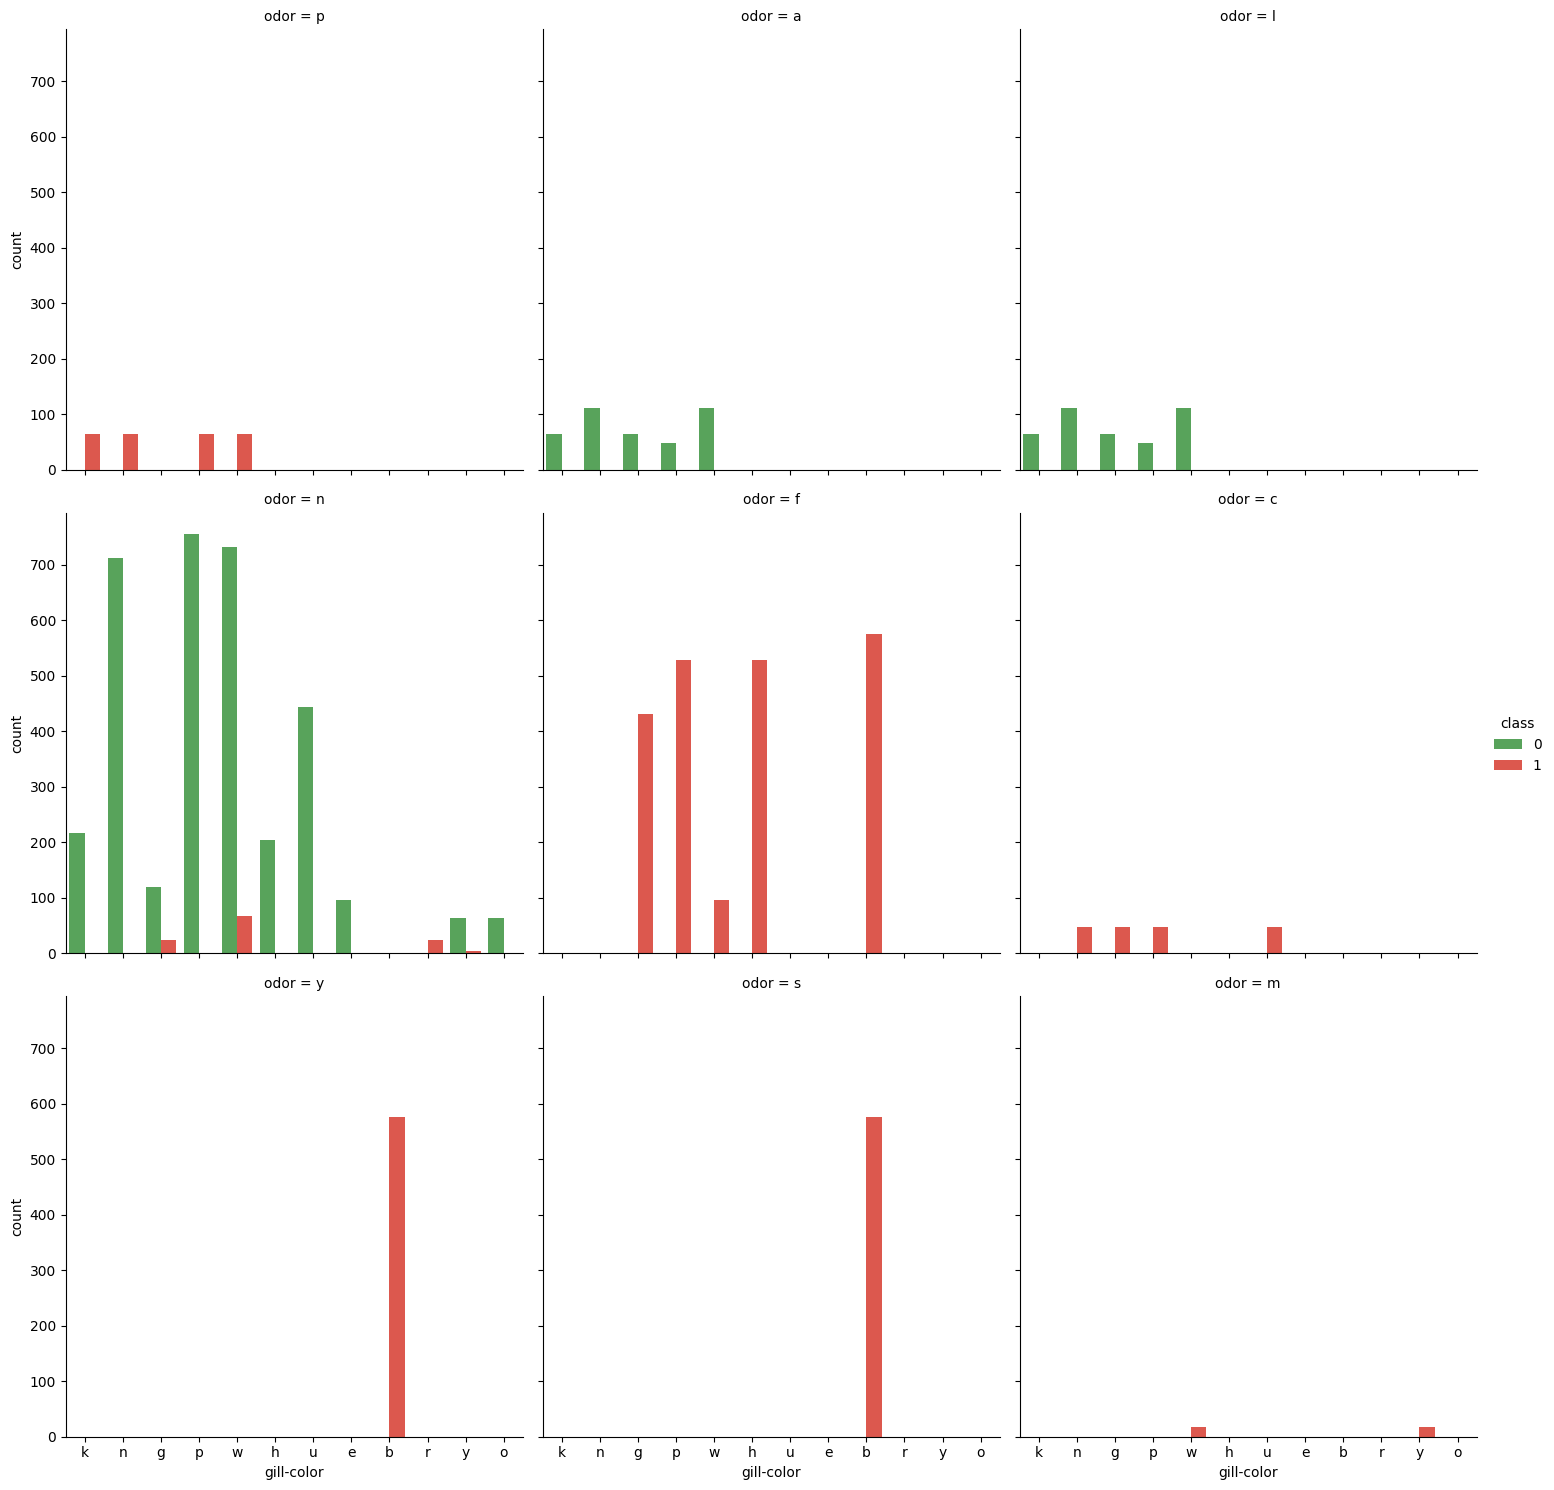

In [25]:
# Sử dụng catplot để tạo Facet Grid
# x = Đặc trưng 1
# hue = Biến đích
# col = Đặc trưng 2 (dùng để "kết hợp" và chia cột)
g = sns.catplot(data=data, 
                x='gill-color',  # Biến ta muốn xem (Màu mang)
                hue='class',     # Biến đích (Độc/Ăn được)
                col='odor',      # Biến "tổ hợp" (Mùi)
                kind='count',    # Loại biểu đồ là đếm
                col_wrap=3,      # Ngắt xuống hàng sau 3 biểu đồ
                palette=['#4CAF50', '#F44336']) # Màu e/p

In [26]:
g.fig.suptitle('Tổ hợp: (Màu mang) vs (Lớp) VỚI ĐIỀU KIỆN (Mùi)', y=1.03)
plt.savefig("combination_plot.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
sns.set_theme(style="whitegrid")

- Phân tích Biến Đích (Target Variable)

C:\Users\kn260\AppData\Local\Temp\ipykernel_22328\3587217950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette=['#4CAF50', '#F44336']) # e=xanh, p=đỏ


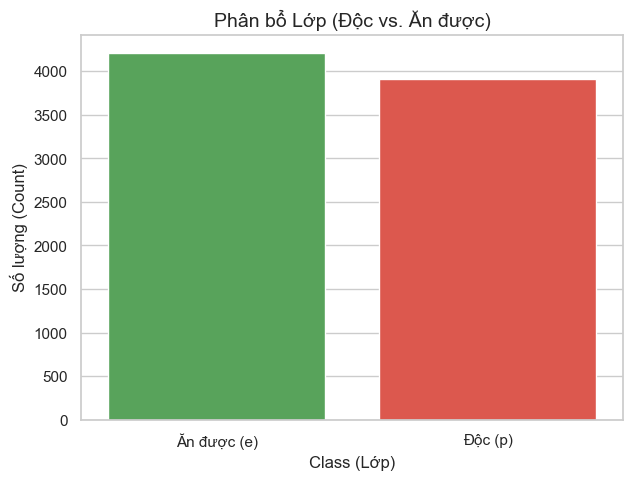

In [28]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='class', palette=['#4CAF50', '#F44336']) # e=xanh, p=đỏ
plt.title('Phân bổ Lớp (Độc vs. Ăn được)', fontsize=14)
plt.xlabel('Class (Lớp)')
plt.ylabel('Số lượng (Count)')
plt.xticks([0, 1], ['Ăn được (e)', 'Độc (p)'])
plt.savefig("B1_Target_Analysis.png")
plt.show()

Mục đích phân tích biến đích là xem dữ liệu có bị mất cân bằng không nếu có thì mô hình sẽ rất khó học.

## 4. Huấn luyện mô hình

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

Tạo tập dataset mới với các cột cần thiết.

Cách 1: Dùng **OrdinalEncoder** + **CategoricalNB**
- Ý tưởng: Dùng OrdinalEncoder để biến mỗi giá trị chữ thành một số nguyên.
    + Ví dụ: cap-color có n=0, y=1, w=2...
    + Ví dụ: odor có a=0, l=1, n=2...
- Mô hình: Dùng CategoricalNB. Đây là mô hình Naïve Bayes được thiết kế đặc biệt để hiểu rằng các số 0, 1, 2... này chỉ là hạng mục (categories), chứ không phải là giá trị (tức là nó hiểu 2 không lớn hơn 1).

- Huấn luyện thử model với 19 cột

In [47]:
data_clean = data.drop(columns=['veil-type', 'veil-color', 'gill-attachment', ])


In [54]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [50]:
X_full = data_clean.drop(columns=['class'])
y_full = data_clean['class']

In [51]:
# --- Bước 1: Mã hóa (Encoding) ---
# Khởi tạo encoder
encoder = OrdinalEncoder()

# Fit và transform toàn bộ X (biến X_char thành X_numeric)
X_numeric = encoder.fit_transform(X_full)

# --- Bước 2: Chia Train/Test ---
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_full, test_size=0.2, random_state=42)


In [52]:
# --- Bước 3: Huấn luyện CategoricalNB ---
# Khởi tạo mô hình
model_cat = CategoricalNB()

# Huấn luyện
model_cat.fit(X_train, y_train)

CategoricalNB()

In [53]:
# --- Bước 4: Đánh giá ---
y_pred = model_cat.predict(X_test)
print(f"Độ chính xác (CategoricalNB): {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
# Tính toán độ chính xác bằng cách so sánh nhãn thực tế (y_test) với nhãn dự đoán (y_pred).

# Đánh giá chi tiết hơn
conf_matrix = confusion_matrix(y_test, y_pred)
# Tạo ma trận nhầm lẫn (confusion matrix) để xem mô hình đã phân loại đúng và sai như thế nào.
# Ma trận này sẽ cho biết số lượng tin nhắn Ham và Spam được dự đoán

# Đây là một "bảng điểm tổng hợp" tự động tính toán từ cái confusion_matrix ở trên.
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Độ chính xác (CategoricalNB): 94.95%
Accuracy: 0.95
Confusion Matrix:
[[837   6]
 [ 76 706]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       843
           1       0.99      0.90      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



- Huấn luyện model với 8 cột trên CSLT

In [35]:
columns_need_encode = [ 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-color',
                       'stalk-shape', 'stalk-root', 'habitat']

data_encoded = pd.get_dummies(data, columns=columns_need_encode)

In [60]:
X = data_encoded.drop('class', axis=1) # Gồm 19 cột đặc trưng
y = data_encoded['class']             # Cột 0/1

In [61]:
encoder = OrdinalEncoder()

In [62]:
# --- Bước 1: Mã hóa (Encoding) ---
# Khởi tạo encoder
encoder = OrdinalEncoder()

# Fit và transform toàn bộ X (biến X_char thành X_numeric)
X_numeric = encoder.fit_transform(X)

# --- Bước 2: Chia Train/Test ---
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)


In [38]:
# --- Bước 3: Huấn luyện CategoricalNB ---
# Khởi tạo mô hình
model_cat = CategoricalNB()

# Huấn luyện
model_cat.fit(X_train, y_train)

CategoricalNB()

In [63]:
# Thử nghiệm: Ra lệnh cho mô hình "thiên vị" lớp 1 (Độc)
# Giả sử ta nói lớp 0 (Ăn được) chỉ chiếm 40%, lớp 1 (Độc) chiếm 60%
model_cat_tuned = CategoricalNB(class_prior=[0.4, 0.6])

model_cat_tuned.fit(X_train, y_train)

CategoricalNB(class_prior=[0.4, 0.6])

In [64]:
# --- Bước 4: Đánh giá ---
#y_pred = model_cat.predict(X_test)
y_pred = model_cat_tuned.predict(X_test)

print(f"Độ chính xác (CategoricalNB): {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
# Tính toán độ chính xác bằng cách so sánh nhãn thực tế (y_test) với nhãn dự đoán (y_pred).

# Đánh giá chi tiết hơn
conf_matrix = confusion_matrix(y_test, y_pred)
# Tạo ma trận nhầm lẫn (confusion matrix) để xem mô hình đã phân loại đúng và sai như thế nào.
# Ma trận này sẽ cho biết số lượng tin nhắn Ham và Spam được dự đoán

# Đây là một "bảng điểm tổng hợp" tự động tính toán từ cái confusion_matrix ở trên.
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Độ chính xác (CategoricalNB): 95.02%
Accuracy: 0.95
Confusion Matrix:
[[835   8]
 [ 73 709]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       843
           1       0.99      0.91      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



- Cách 2: Dùng **OneHotEncoder** + **BernoulliNB**
- Ý tưởng: Dùng OneHotEncoder để biến mỗi giá trị chữ thành một cột nhị phân (0/1) mới.
    + Ví dụ: Cột cap-color (10 màu) sẽ "nổ" thành 10 cột mới: cap-color_n, cap-color_y, cap-color_w...
    + Nếu một hàng có cap-color='y', thì cột cap-color_y sẽ là 1, 9 cột kia là 0.
- Mô hình: Dùng BernoulliNB. Đây là mô hình Naïve Bayes được thiết kế cho dữ liệu nhị phân (binary). Nó trả lời câu hỏi "Đặc trưng này có xuất hiện (1) hay không xuất hiện (0)?".

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import BernoulliNB

In [55]:
X1 = data_clean.drop('class', axis=1)
y1 = data_clean['class']

In [56]:
# --- Bước 1: Mã hóa (Encoding) ---
# Khởi tạo encoder, handle_unknown='ignore' để xử lý nếu test set có giá trị lạ
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) 

# Fit và transform
# X_binary sẽ là một ma trận RẤT RỘNG (ví dụ: 100+ cột) toàn số 0 và 1
X_binary = ohe_encoder.fit_transform(X1)

# --- Bước 2: Chia Train/Test ---
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_binary, y1, test_size=0.2, random_state=42)


In [57]:
# --- Bước 3: Huấn luyện BernoulliNB ---
model_bern = BernoulliNB()

# Huấn luyện
model_bern.fit(X_train_b, y_train_b)

BernoulliNB()

In [58]:
# --- Bước 4: Đánh giá ---
y_pred_b = model_bern.predict(X_test_b)
print(f"Độ chính xác (BernoulliNB): {accuracy_score(y_test_b, y_pred_b) * 100:.2f}%")

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test_b, y_pred_b)
# Tính toán độ chính xác bằng cách so sánh nhãn thực tế (y_test) với nhãn dự đoán (y_pred).

# Đánh giá chi tiết hơn
conf_matrix = confusion_matrix(y_test_b, y_pred_b)
# Tạo ma trận nhầm lẫn (confusion matrix) để xem mô hình đã phân loại đúng và sai như thế nào.
# Ma trận này sẽ cho biết số lượng tin nhắn Ham và Spam được dự đoán

# Đây là một "bảng điểm tổng hợp" tự động tính toán từ cái confusion_matrix ở trên.
classification_rep = classification_report(y_test_b, y_pred_b)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Độ chính xác (BernoulliNB): 93.66%
Accuracy: 0.94
Confusion Matrix:
[[829  14]
 [ 89 693]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       843
           1       0.98      0.89      0.93       782

    accuracy                           0.94      1625
   macro avg       0.94      0.93      0.94      1625
weighted avg       0.94      0.94      0.94      1625



- Model 1 (CategoricalNB): 94.95% Model 2 (BernoulliNB): 95.88%